# Amazon Books Review Analysis

## Importing Dependencies

In [ ]:
#GROUP:Harshil Chaddha(22107028)
    # Armaan Singh Parmar(22107030)

In [2]:
!pip install vaderSentiment
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


## Reading Data from file

In [3]:
br = pd.read_csv(r"/kaggle/input/amazon-books-reviews/Books_rating.csv")
bd = pd.read_csv(r"/kaggle/input/amazon-books-reviews/books_data.csv")


In [4]:
br.head(5)

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


In [5]:
bd.head(5)

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


## **Data Pre-Processing**

### Merging both the dataset

In [6]:
books = pd.merge(br,bd, on = 'Title')
books.shape

(3000000, 19)

### extracting useful columns

In [7]:
df = books[['Title','review/score','review/text','authors','categories','ratingsCount']]

### Dropping Duplicates

In [8]:
df.drop_duplicates(inplace = True)
df.shape

/tmp/ipykernel_42/3208856916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace = True)


(2617289, 6)

In [9]:
df.isna().sum()

Title               207
review/score          0
review/text           8
authors          350198
categories       465848
ratingsCount    1234897
dtype: int64

### Dropping Null Values

In [10]:
df.dropna(inplace = True)
df.isna().sum()

/tmp/ipykernel_42/1508174486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


Title           0
review/score    0
review/text     0
authors         0
categories      0
ratingsCount    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325891 entries, 47 to 2999999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   Title         1325891 non-null  object 
 1   review/score  1325891 non-null  float64
 2   review/text   1325891 non-null  object 
 3   authors       1325891 non-null  object 
 4   categories    1325891 non-null  object 
 5   ratingsCount  1325891 non-null  float64
dtypes: float64(2), object(4)
memory usage: 70.8+ MB


In [12]:
df.shape

(1325891, 6)

### Using only the fraction of dataset to reduce the running time on big data

In [13]:
data = df.sample(15000)
data.shape

(15000, 6)

### Removing brackets and colons from authors name

In [14]:
data['authors'] = data['authors'].str.extract(r'\'(.*)\'')

### Removes brackets and colons from categories

In [15]:
data['categories'] = data['categories'].str.extract(r'\'(.*)\'')

### Counting the length of each review

In [16]:
data['word_count'] = data['review/text'].apply(lambda x: len(x.split(' ')))

In [17]:
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
1123055,The Assassin,5.0,"I have to say, this is one of the best suspens...",Matthew Quirk,Fiction,2.0,99
1180512,The Book of Ruth,3.0,"It was an ok book. I read it last week, and I ...",Jane Hamilton,Fiction,39.0,82
28403,Fahrenheit 451,2.0,If you look at Farenheit 451 from the perspect...,Ray Bradbury,Book burning,1.0,214
2280455,Odd Thomas,5.0,This was my first exposure to Dean Koontz and ...,Dean Koontz,Fiction,168.0,93
683668,The Dolphins of Pern,4.0,i really liked the book. but my only problem i...,Anne McCaffrey,Fiction,12.0,43


In [18]:
## data.to_csv('sample.csv', index=False)

# **EDA**

## Distribution of Books in Market based on Genre

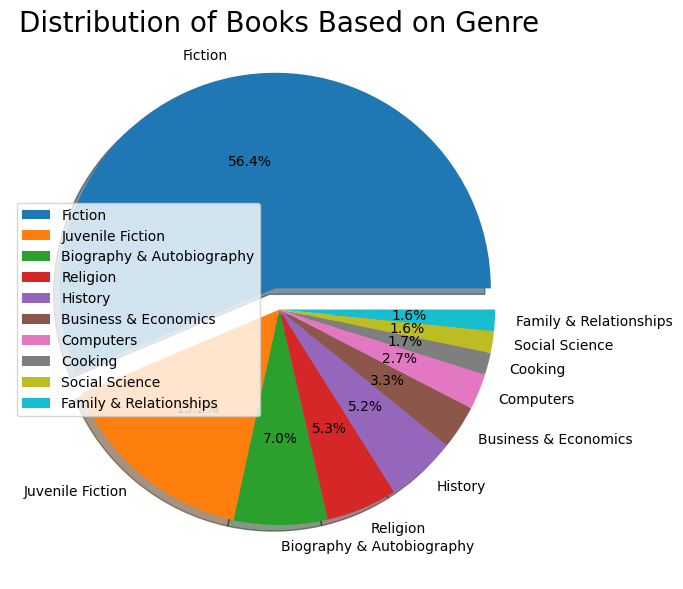

In [19]:
plt.figure(figsize=(7,7))
labels=['Fiction','Juvenile Fiction','Biography & Autobiography','Religion','History','Business & Economics','Computers','Cooking','Social Science','Family & Relationships']
plt.pie(data['categories'].value_counts().head(10),explode=(0.1,0,0,0,0,0,0,0,0,0), labels=labels,autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Books Based on Genre', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

## Most frequent Words in over 3 rated Reviews

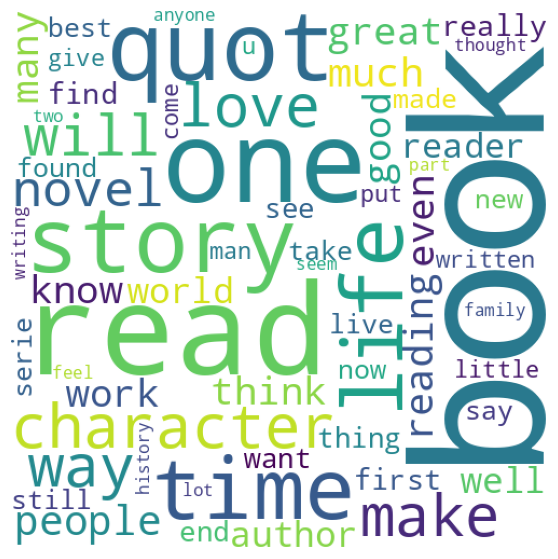

In [20]:
from wordcloud import WordCloud

wc = WordCloud(width=500,height=500,min_font_size=15,background_color='white')
spam_wc = wc.generate(data[data['review/score'] > 3]['review/text'].str.cat(sep=" "))

plt.figure(figsize=(7,7))
plt.axis('off')
plt.imshow(spam_wc)

## Most Reviewed Books

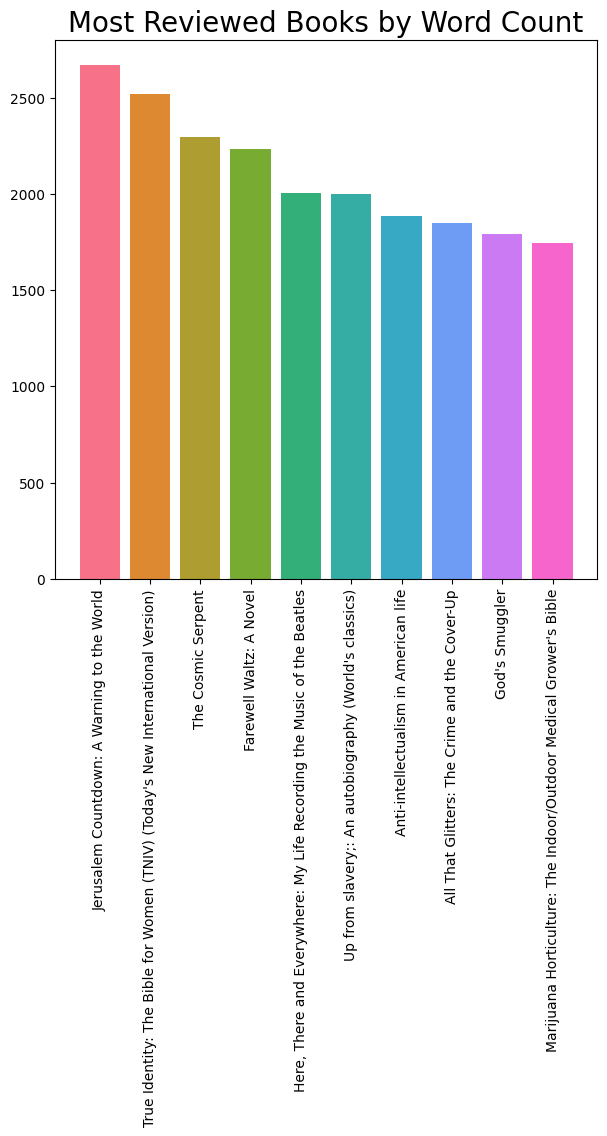

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns  
plt.figure(figsize=(7, 7))
cou = data[data['word_count'] > 1707][['Title', 'word_count']].sort_values(by='word_count', ascending=False)
colors = sns.color_palette('husl', n_colors=len(cou))
bars = plt.bar(cou['Title'], cou['word_count'], color=colors)
plt.title('Most Reviewed Books by Word Count', fontsize=20)
plt.xticks(rotation=90)
plt.show()

## Highest Rated Books with over 4000 ratings each Book

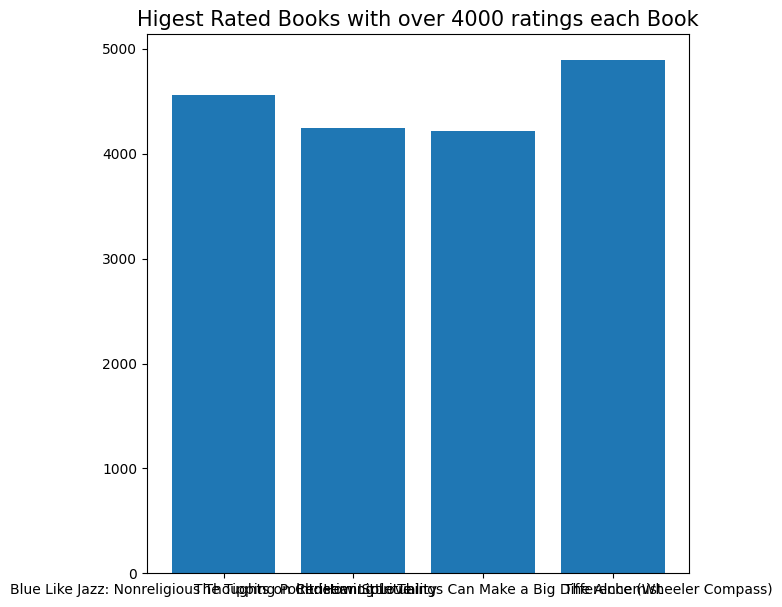

In [22]:
plt.figure(figsize = (7, 7))
rating_counts = data[data['ratingsCount'] > 4000][['Title','ratingsCount']].drop_duplicates()
plt.bar(rating_counts['Title'],rating_counts['ratingsCount'])
plt.title('Higest Rated Books with over 4000 ratings each Book', fontsize = 15)
plt.show()

## In which Genres readers give Positive and Negative Ratings

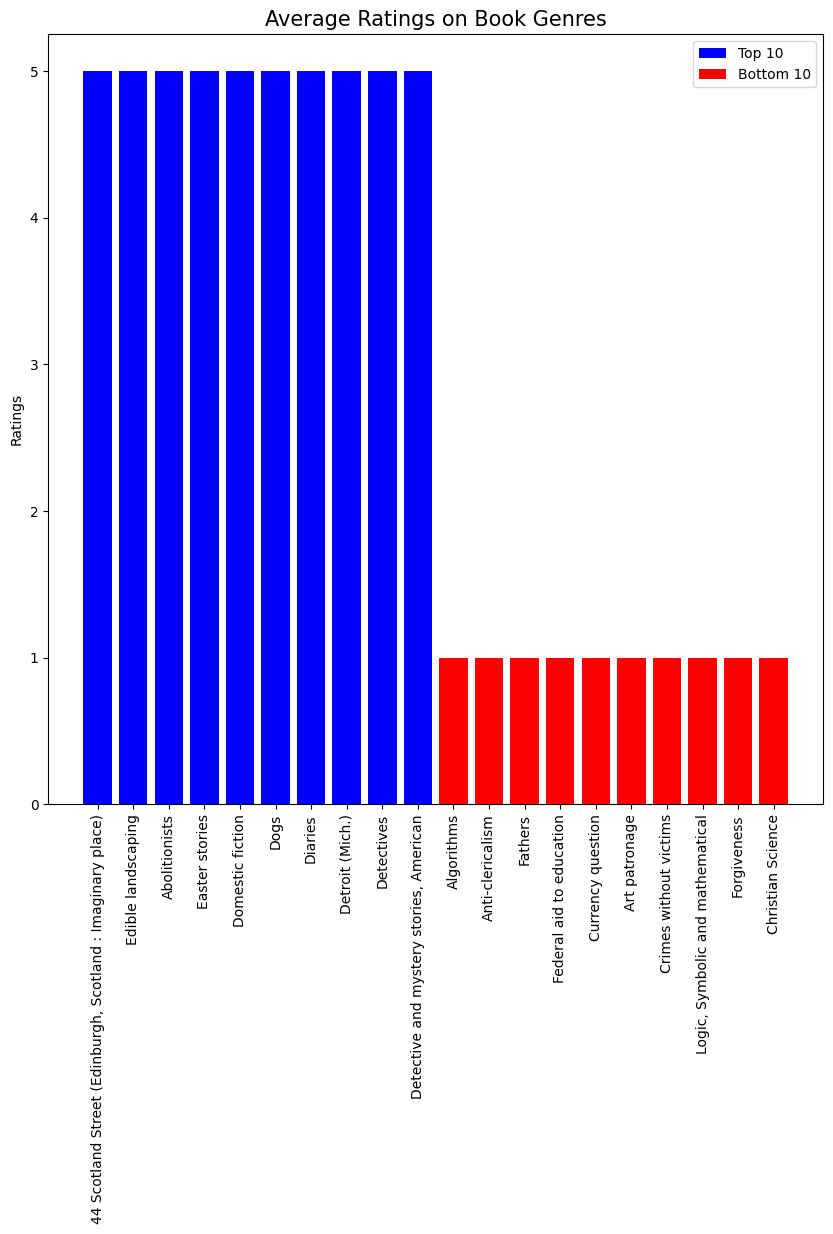

In [23]:
# Convert 'review/score' column to numeric (if applicable)
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Filter out non-numeric values (if any)
numeric_data = data.dropna(subset=['review/score'])

# Group by 'categories' and compute the mean of 'review/score'
avg_cat_rating = numeric_data.groupby('categories')['review/score'].mean().sort_values(ascending=False).head(10)
avg_cat_rating_d = numeric_data.groupby('categories')['review/score'].mean().sort_values().head(10)

# Plot the bar chart for top and bottom categories
plt.figure(figsize=(10, 10))
plt.bar(avg_cat_rating.index, avg_cat_rating, color='blue', label='Top 10')
plt.bar(avg_cat_rating_d.index, avg_cat_rating_d, color='red', label='Bottom 10')
plt.title('Average Ratings on Book Genres', fontsize=15)
plt.xticks(rotation='vertical')
plt.ylabel('Ratings')
plt.legend()
plt.show()

## Top 10 Authors with 5 star Ratings

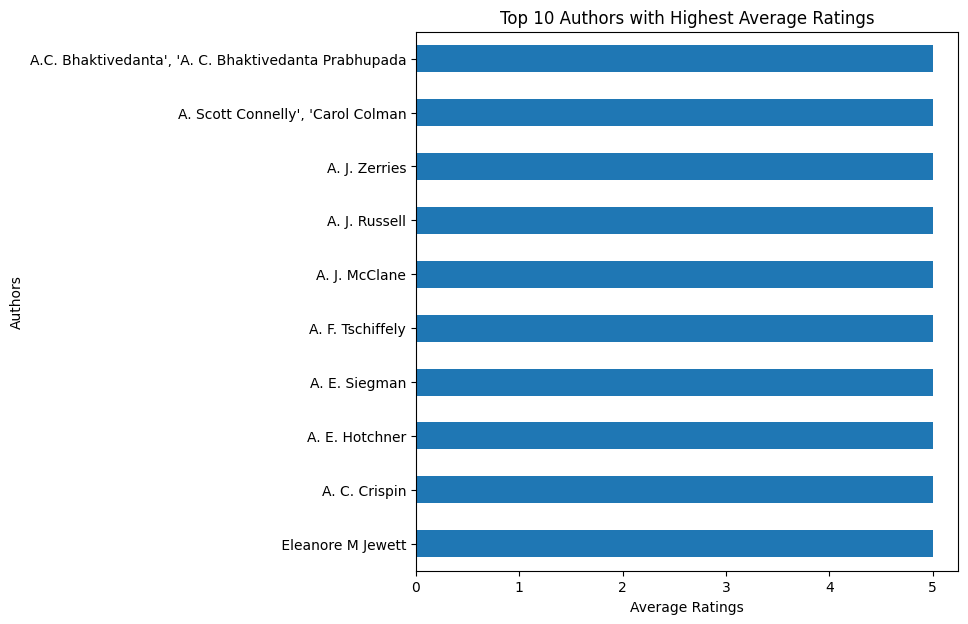

In [24]:
# Convert 'review/score' column to numeric, coercing errors to NaN
data['review/score'] = pd.to_numeric(data['review/score'], errors='coerce')

# Group by 'authors', compute the mean of 'review/score', and plot the top 10 authors
top_authors = data.groupby('authors')['review/score'].mean().nlargest(10)
top_authors.plot(kind='barh', figsize=(7, 7))
plt.title('Top 10 Authors with Highest Average Ratings')
plt.xlabel('Average Ratings')
plt.ylabel('Authors')
plt.show()

## Top 10 Authors with 1 star Ratings

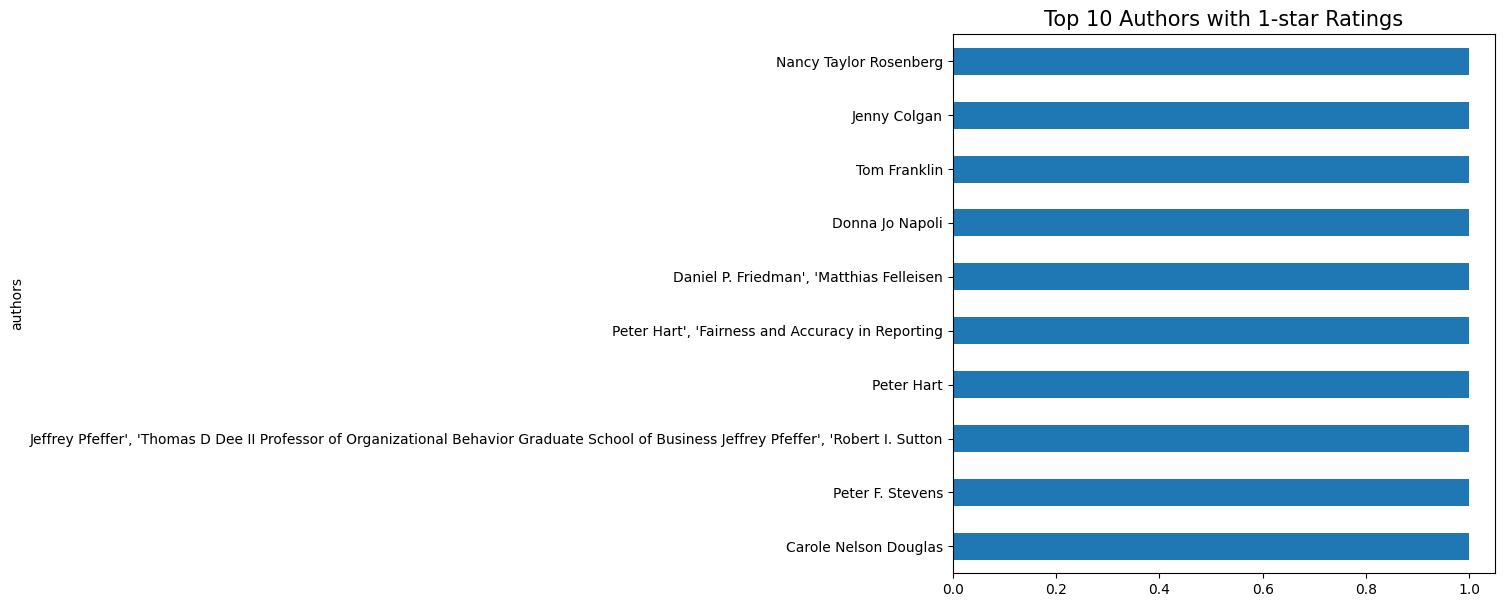

In [25]:
# Grouping the data by authors and calculating the mean review score for each author
average_scores_by_author = data.groupby('authors')['review/score'].mean()

# Sorting the authors based on their average review scores and selecting the bottom 10 (lowest scores)
bottom_10_authors = average_scores_by_author.sort_values(ascending=True).head(10)

# Creating a horizontal bar plot to show the top 10 authors with the lowest average review scores
bottom_10_authors.plot(kind='barh', figsize=(7,7))

# Setting the title for the plot
plt.title('Top 10 Authors with 1-star Ratings', fontsize=15)

# Displaying the plot
plt.show()


## Number of Books written by each Author

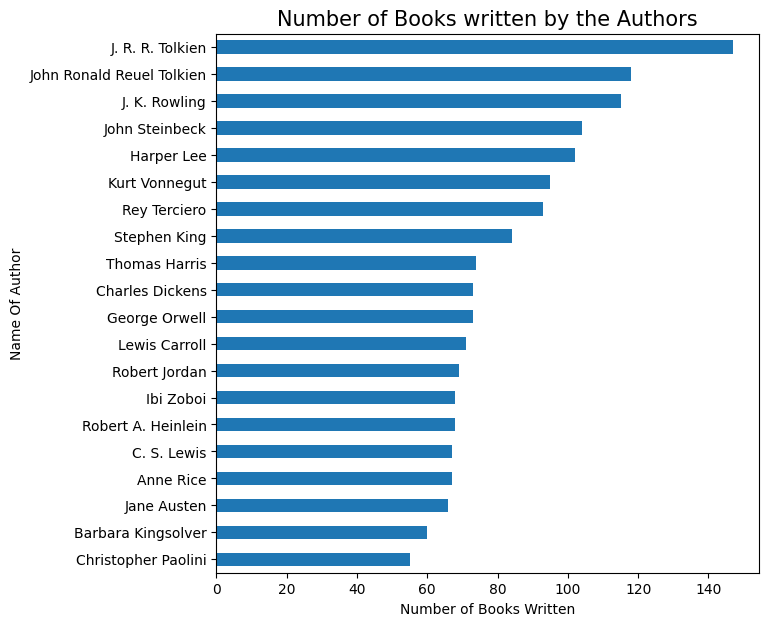

In [26]:
data['authors'].value_counts().head(20).sort_values(ascending = True).plot(kind='barh', figsize=(7,7))
plt.title('Number of Books written by the Authors', fontsize = 15)
plt.ylabel('Name Of Author')
plt.xlabel('Number of Books Written')
plt.show()

# **Sentiment Analysis**

In [27]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [28]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer()

In [29]:
data.head(2)

,Title,review/score,review/text,authors,categories,ratingsCount,word_count
1123055,The Assassin,5.0,"I have to say, this is one of the best suspens...",Matthew Quirk,Fiction,2.0,99
1180512,The Book of Ruth,3.0,"It was an ok book. I read it last week, and I ...",Jane Hamilton,Fiction,39.0,82


In [30]:
# Lower casing the reviews
data['clean_reviews'] = data['review/text'].str.lower()
# Calculating Polarity score of reviews
data['score'] = data['clean_reviews'].apply(lambda review: vader.polarity_scores(review))
# Extracting compound column
data['compound']  = data['score'].apply(lambda score_dict: score_dict['compound'])

In [31]:
# if compound value is more than 0.05 then it precive as positive
# if compound value is less than -0.0 then it precive as negative
# if compound value is equal to 0.0 then it precive as neutral

data['Sentiment'] = data['compound'].apply(lambda x: 'positive' if x >= 0.05 else 'negative' if x < -0.05 else 'neutral')
data.head()

,Title,review/score,review/text,authors,categories,ratingsCount,word_count,clean_reviews,score,compound,Sentiment
1123055,The Assassin,5.0,"I have to say, this is one of the best suspens...",Matthew Quirk,Fiction,2.0,99,"i have to say, this is one of the best suspens...","{'neg': 0.012, 'neu': 0.812, 'pos': 0.175, 'co...",0.9609,positive
1180512,The Book of Ruth,3.0,"It was an ok book. I read it last week, and I ...",Jane Hamilton,Fiction,39.0,82,"it was an ok book. i read it last week, and i ...","{'neg': 0.139, 'neu': 0.804, 'pos': 0.057, 'co...",-0.7554,negative
28403,Fahrenheit 451,2.0,If you look at Farenheit 451 from the perspect...,Ray Bradbury,Book burning,1.0,214,if you look at farenheit 451 from the perspect...,"{'neg': 0.151, 'neu': 0.76, 'pos': 0.088, 'com...",-0.9468,negative
2280455,Odd Thomas,5.0,This was my first exposure to Dean Koontz and ...,Dean Koontz,Fiction,168.0,93,this was my first exposure to dean koontz and ...,"{'neg': 0.042, 'neu': 0.803, 'pos': 0.155, 'co...",0.8977,positive
683668,The Dolphins of Pern,4.0,i really liked the book. but my only problem i...,Anne McCaffrey,Fiction,12.0,43,i really liked the book. but my only problem i...,"{'neg': 0.122, 'neu': 0.656, 'pos': 0.222, 'co...",0.7758,positive


## Distribution of Negative, Neutral and Positive Sentiment in whole corpus

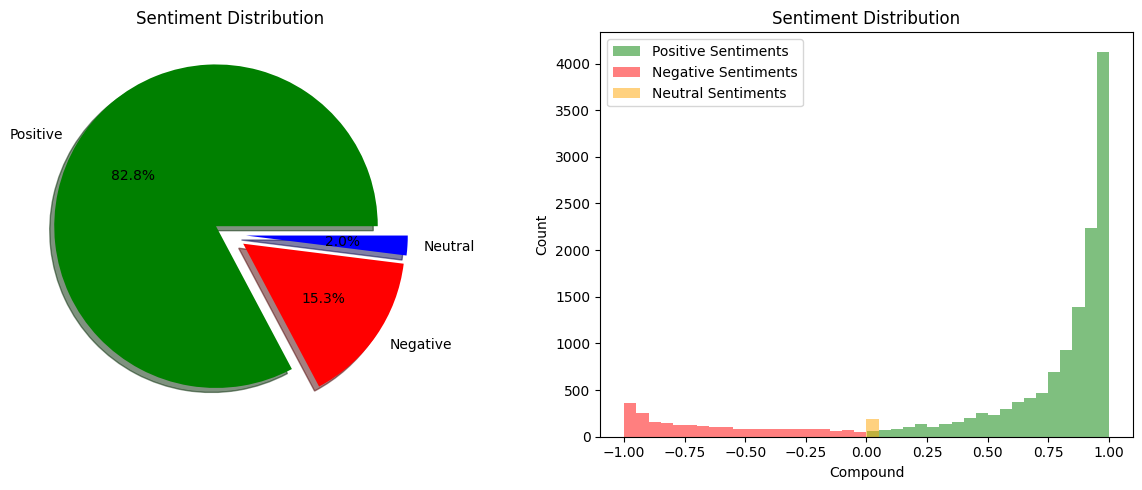

In [32]:
import matplotlib.pyplot as plt

# Create a figure and subplots with 1 row and 2 columns
plt.figure(figsize=(12, 5))

# Plot 1 - Pie chart for sentiment distribution
plt.subplot(1, 2, 1)
labels = ['Positive', 'Negative', 'Neutral']
sizes = data['Sentiment'].value_counts()
colors = ['green', 'red', 'blue']
explode = (0.1, 0.1, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Sentiment Distribution')

# Plot 2 - Histogram for sentiment distribution
plt.subplot(1, 2, 2)
positive = data[data['compound'] > 0]['compound']
negative = data[data['compound'] < 0]['compound']
neutral = data[data['compound'] == 0]['compound']

sentiments = [positive, negative, neutral]
colors = ['green', 'red', 'orange']
labels = ['Positive Sentiments', 'Negative Sentiments', 'Neutral Sentiments']

for sentiment, color, label in zip(sentiments, colors, labels):
    plt.hist(sentiment, bins=20, color=color, alpha=0.5, label=label)

plt.title('Sentiment Distribution')
plt.xlabel('Compound')
plt.ylabel('Count')
plt.legend()

plt.tight_layout()
plt.show()


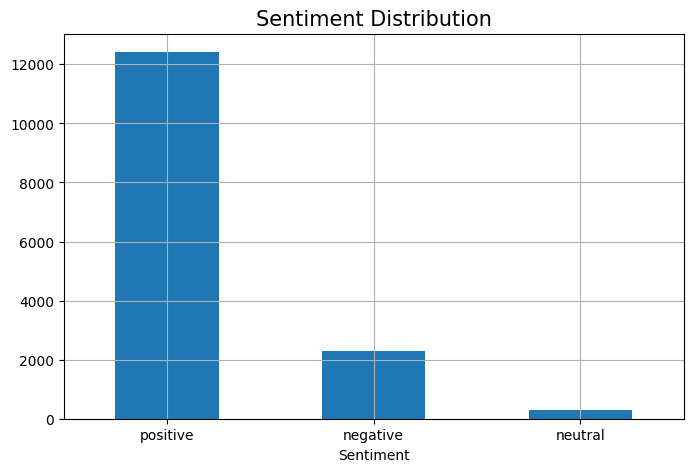

In [33]:
data['Sentiment'].value_counts().plot(kind = 'bar', figsize = (8,5))
plt.xticks(rotation = 'horizontal')
plt.title('Sentiment Distribution',fontsize = 15)
plt.grid()
plt.show()

## Most number of **Positive** Reviews on the Books

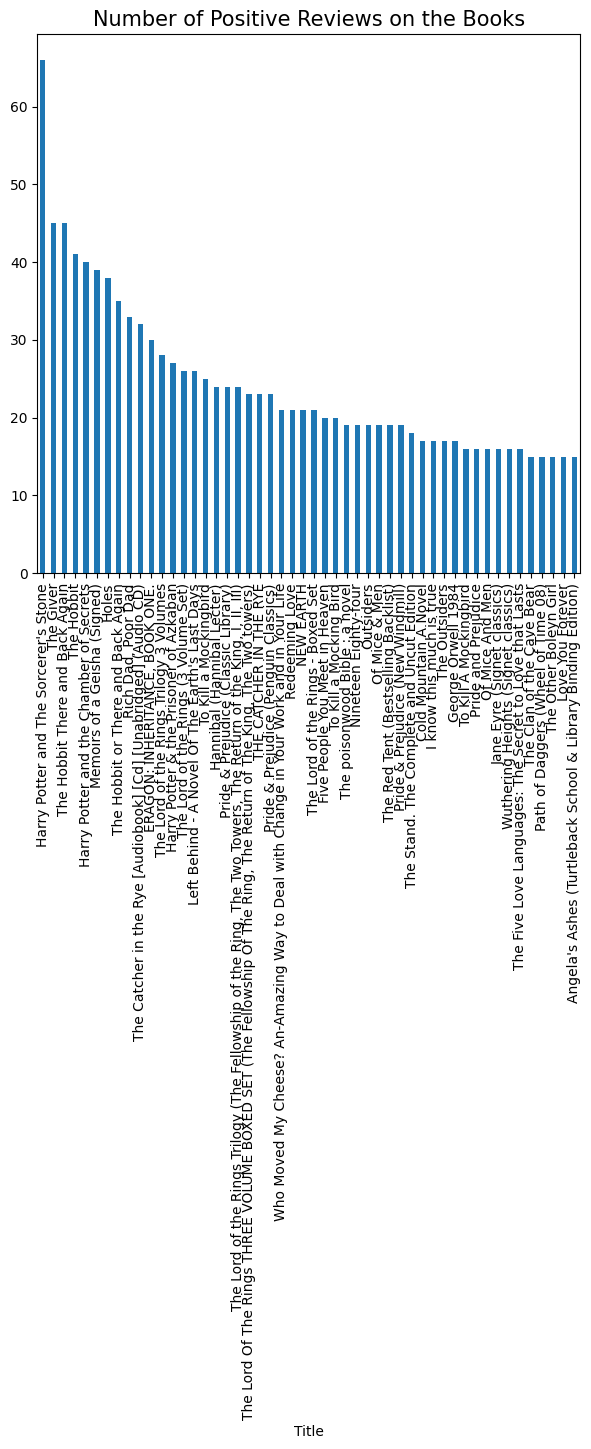

In [34]:
data[data['Sentiment'] == 'positive']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Positive Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Neutral** Reviews on the Books

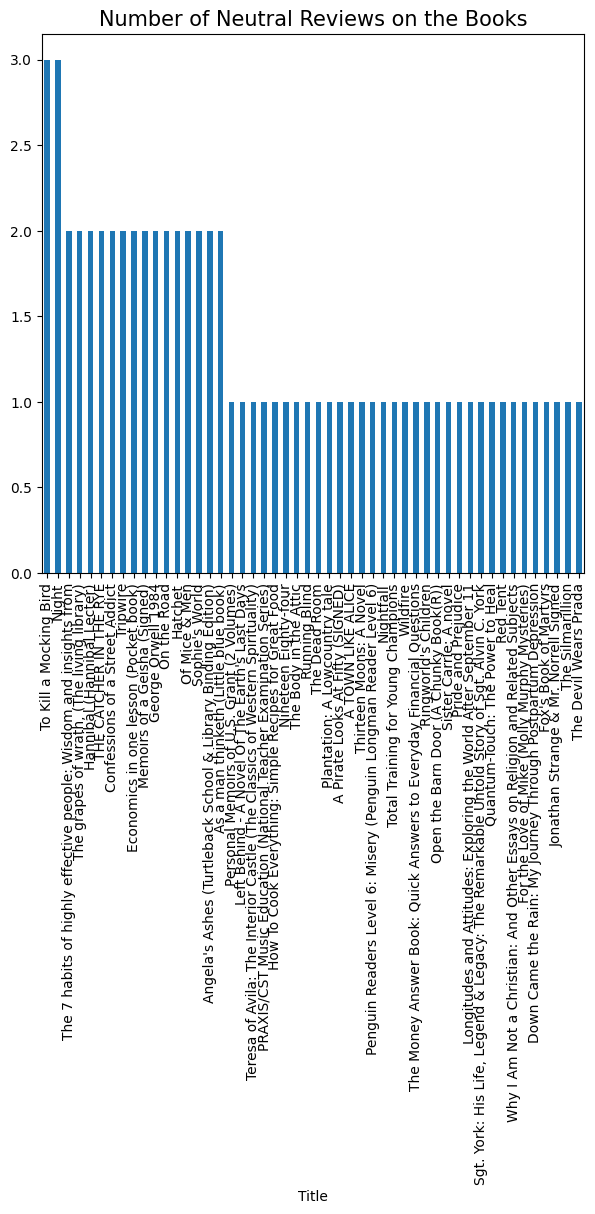

In [35]:
data[data['Sentiment'] == 'neutral']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Neutral Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Most number of **Negative** Reviews on the Books

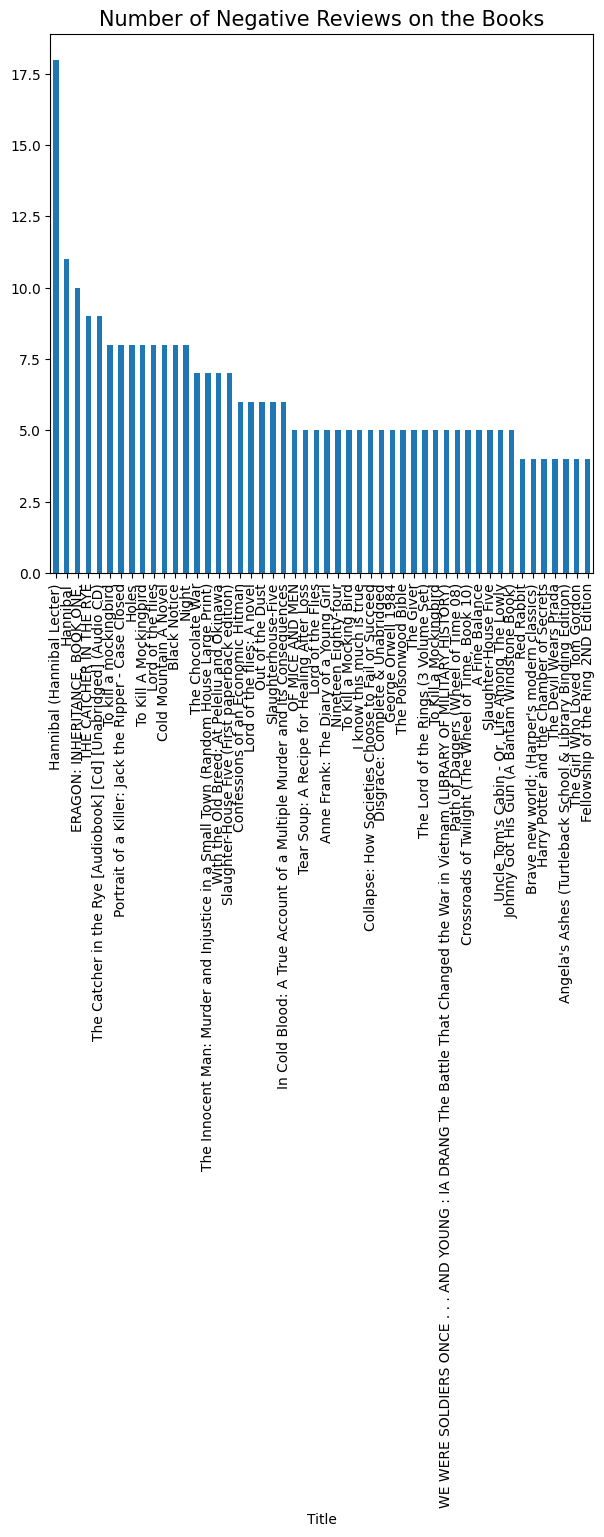

In [36]:
data[data['Sentiment'] == 'negative']['Title'].value_counts().head(50).plot(kind = 'bar', figsize = (7,7))
plt.title('Number of Negative Reviews on the Books',fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

## Dataframe of Reviews vs Sentiments

In [37]:
reviews_df = data[['clean_reviews', 'Sentiment']]

In [38]:
reviews_df.head()

,clean_reviews,Sentiment
1123055,"i have to say, this is one of the best suspens...",positive
1180512,"it was an ok book. i read it last week, and i ...",negative
28403,if you look at farenheit 451 from the perspect...,negative
2280455,this was my first exposure to dean koontz and ...,positive
683668,i really liked the book. but my only problem i...,positive


## Dividing Data into x & y 

In [39]:
x = reviews_df.drop(['Sentiment'], axis=1)
y = reviews_df['Sentiment']

In [40]:
x.shape

(15000, 1)

In [41]:
y.shape

(15000,)

# **text - preprocessing**

In [42]:
import numpy as np # basic Libraries
import pandas as pd
import seaborn as sns
import nltk

In [43]:
!pip install -U nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.4
    Uninstalling nltk-3.2.4:
      Successfully uninstalled nltk-3.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
preprocessing 0.1.13 requires nltk==3.2.4, but you have nltk 3.8.1 which is incompatible.


In [44]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [45]:
import re # regular expression module
stemmer = nltk.SnowballStemmer("english") # for stemming
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english')) # for stopword

In [46]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
import re, string, unicodedata
from string import punctuation

In [47]:
def hapus_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def lemmi(text):
    lemmatizer = WordNetLemmatizer()
    text=' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

def final_clean(text):
    final_text= []
    for i in text.split():
        if i.strip().lower() not in stopword and i.strip().lower().isalpha():
            final_text.append(i.strip().lower())
    return " ".join(final_text)

In [48]:
def clean(text):
    text = hapus_url(text)
    text = remove_special_characters(text, remove_digits=True)
    text = lemmi(text)
    text = final_clean(text)
    return text

In [49]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

# Now you can import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordnet/README  
  inflating: /kaggle/working/corpora/wordnet/index.sense  
  inflating: /kaggle/working/corpora/wordnet/data.

In [50]:
x["clean_reviews"] = x["clean_reviews"].apply(clean)

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=0)

In [52]:
x_train

,clean_reviews
2183966,read lot series far never disappointed book he...
797289,sorry book beautifully laid everything recipe ...
430948,bought handy little pocket book giving one eve...
642689,detailed account alaska move slowly beautifull...
1614249,personal favorite harry potter bookswhy new ch...
...,...
2628863,copy book ha page possibly best page ive ever ...
1024005,excellent book nearly paint scenery mind book ...
2863514,rockwell another long line haunted personality...
2338317,lighthouse published landmark modernist novelw...


In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
tfidf_vectorizer = TfidfVectorizer()  # You can adjust the max_features parameter

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train['clean_reviews'])

# Transform the 'clean_reviews' column on the testing data
x_test_tfidf = tfidf_vectorizer.transform(x_test['clean_reviews'])

In [55]:
x_train_tfidf_df = pd.DataFrame(x_train_tfidf.toarray())
x_test_tfidf_df =  pd.DataFrame(x_test_tfidf.toarray())

## Balancing Data

### Using Smote for Balancing Data

In [56]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_bal, y_train_bal = oversample.fit_resample(x_train_tfidf, y_train)
y_train_bal.value_counts()

Sentiment
positive    9293
negative    9293
neutral     9293
Name: count, dtype: int64

In [57]:
x_test_bal, y_test_bal = oversample.fit_resample(x_test_tfidf, y_test)
y_test_bal.value_counts()

Sentiment
positive    3123
negative    3123
neutral     3123
Name: count, dtype: int64

## **Model Training**

## 1) Logistic Regression

### Applying Logistic Regression on Imbalanced Data

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [59]:
log = LogisticRegression()
log.fit(x_train_tfidf_df, y_train)

LogisticRegression()

In [60]:
perd_log=log.predict(x_test_tfidf_df)

In [61]:
print(classification_report(perd_log, y_test))

              precision    recall  f1-score   support

    negative       0.24      0.85      0.38       158
     neutral       0.00      0.00      0.00         0
    positive       0.99      0.86      0.92      3592

    accuracy                           0.86      3750
   macro avg       0.41      0.57      0.43      3750
weighted avg       0.96      0.86      0.90      3750



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Applying Logistic Regression on Balanced Data

In [62]:
log_bal = LogisticRegression()
log_bal.fit(x_train_bal, y_train_bal)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
perd_log_bal =log_bal.predict(x_test_bal)

In [64]:
print(classification_report(perd_log_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.76      0.63      0.69      3722
     neutral       0.11      0.89      0.19       368
    positive       0.92      0.54      0.68      5279

    accuracy                           0.59      9369
   macro avg       0.59      0.69      0.52      9369
weighted avg       0.82      0.59      0.66      9369



In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(y_test_bal,perd_log_bal)

array([[2360,   26,  737],
       [1112,  328, 1683],
       [ 250,   14, 2859]])

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

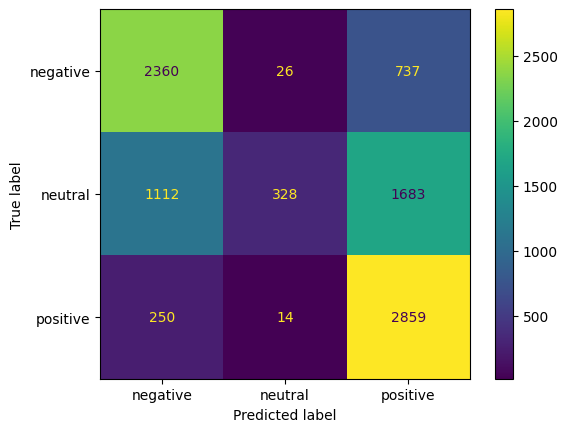

In [68]:
cm = confusion_matrix(y_test_bal, perd_log_bal, labels=log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=log.classes_)
disp.plot()

## 2) Decision Tree

### Decision tree on imbalanced Data

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
classifier= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier.fit(x_train_tfidf_df, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [71]:
pred_tre = classifier.predict(x_test_tfidf_df)

In [72]:
print(classification_report(pred_tre, y_test))

              precision    recall  f1-score   support

    negative       0.36      0.35      0.35       559
     neutral       0.15      0.17      0.16        71
    positive       0.87      0.87      0.87      3120

    accuracy                           0.78      3750
   macro avg       0.46      0.46      0.46      3750
weighted avg       0.78      0.78      0.78      3750



In [73]:
confusion_matrix(y_test,pred_tre)

array([[ 196,   12,  341],
       [  16,   12,   50],
       [ 347,   47, 2729]])

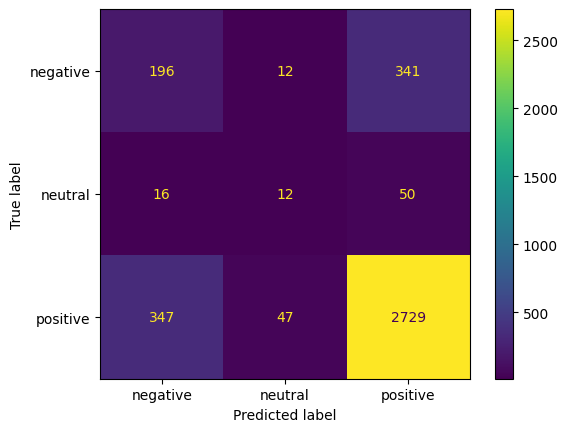

In [74]:
cm = confusion_matrix(y_test, pred_tre, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

### Decision tree on balanced data

In [75]:
classifier_bal= DecisionTreeClassifier(criterion='entropy', random_state=45)
classifier_bal.fit(x_train_bal, y_train_bal)

DecisionTreeClassifier(criterion='entropy', random_state=45)

In [76]:
pred_tre_bal = classifier_bal.predict(x_test_bal)

In [77]:
print(classification_report(pred_tre_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.52      0.49      0.51      3273
     neutral       0.12      0.68      0.21       553
    positive       0.81      0.46      0.58      5543

    accuracy                           0.48      9369
   macro avg       0.48      0.54      0.43      9369
weighted avg       0.67      0.48      0.53      9369



In [78]:
confusion_matrix(y_test_bal,pred_tre_bal)

array([[1617,   91, 1415],
       [1140,  378, 1605],
       [ 516,   84, 2523]])

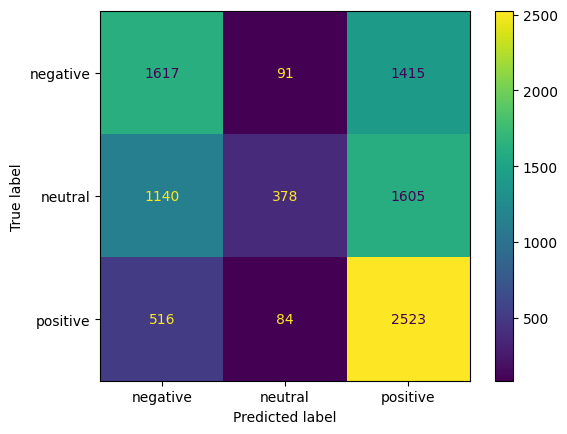

In [79]:
cm = confusion_matrix(y_test_bal, pred_tre_bal, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()

## 3) Naive Bayes

### Naive bayes on imbalanced Data

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [81]:
nb.fit(x_train_tfidf_df, y_train)

GaussianNB()

In [82]:
pred_nb = nb.predict(x_test_tfidf_df)

In [83]:
print(classification_report(pred_nb, y_test))

              precision    recall  f1-score   support

    negative       0.29      0.14      0.18      1160
     neutral       0.06      0.10      0.08        49
    positive       0.68      0.84      0.75      2541

    accuracy                           0.61      3750
   macro avg       0.34      0.36      0.34      3750
weighted avg       0.55      0.61      0.57      3750



### Naive Bayes on Balanced Data

In [84]:
import numpy as np

# Assuming x_train_bal is your sparse matrix
x_train_bal_dense = x_train_bal.toarray()

# Then proceed with fitting the model using the dense array
nb_bal = GaussianNB()
nb_bal.fit(x_train_bal_dense, y_train_bal)

GaussianNB()

In [85]:
pred_nb_bal = nb_bal.predict(x_test_bal.toarray())

In [86]:
print(classification_report(pred_nb_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.19      0.19      0.19      3130
     neutral       0.01      0.48      0.03        91
    positive       0.68      0.35      0.46      6148

    accuracy                           0.30      9369
   macro avg       0.30      0.34      0.23      9369
weighted avg       0.51      0.30      0.37      9369



## 4) RandomForest 

### RandomForest on Imbalanced Data

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
x_train_tfidf_df.shape

(11250, 62831)

In [89]:
x_test_tfidf_df.shape

(3750, 62831)

In [90]:
ran=RandomForestClassifier(n_estimators=100)
ran.fit(x_train_tfidf_df,y_train)

RandomForestClassifier()

In [91]:
perd_ran=ran.predict(x_test_tfidf_df)

In [92]:
perd_ran.shape

(3750,)

In [93]:
confusion_matrix(y_test,perd_ran)

array([[  14,    0,  535],
       [   1,    0,   77],
       [   1,    0, 3122]])

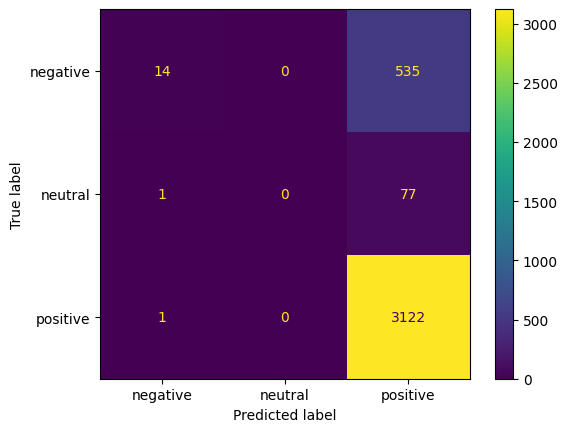

In [94]:
cm = confusion_matrix(y_test, perd_ran, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [95]:
y_test.shape , perd_ran.shape

((3750,), (3750,))

In [96]:
print(classification_report(perd_ran, y_test))

              precision    recall  f1-score   support

    negative       0.03      0.88      0.05        16
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.84      0.91      3734

    accuracy                           0.84      3750
   macro avg       0.34      0.57      0.32      3750
weighted avg       1.00      0.84      0.91      3750



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### RandomForest on balanced Data

In [97]:
ran_bal=RandomForestClassifier(n_estimators=100)
ran_bal.fit(x_train_bal,y_train_bal)
perd_ran_bal=ran_bal.predict(x_test_bal)

In [98]:
confusion_matrix(y_test_bal,perd_ran_bal)

array([[1286,    0, 1837],
       [ 230,    5, 2888],
       [  85,    0, 3038]])

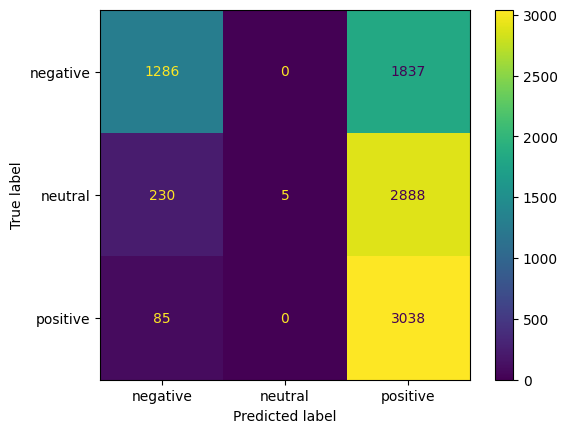

In [99]:
cm = confusion_matrix(y_test_bal, perd_ran_bal, labels=ran.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=ran.classes_)
disp.plot()

In [100]:
print(classification_report(perd_ran_bal, y_test_bal))

              precision    recall  f1-score   support

    negative       0.41      0.80      0.54      1601
     neutral       0.00      1.00      0.00         5
    positive       0.97      0.39      0.56      7763

    accuracy                           0.46      9369
   macro avg       0.46      0.73      0.37      9369
weighted avg       0.88      0.46      0.56      9369



### Saving the best model

In [101]:
import pickle

In [102]:
pickle.dump(log_bal, open('log_bal.pkl','wb'))

In [103]:
with open('log_bal','wb') as f:
  pickle.dump(log_bal,f)

In [104]:
with open('log_bal','rb') as f:
  mp=pickle.load(f)

In [105]:
def predict(text):
  input_text = [text]
  text_to_vec = tfidf_vectorizer.transform(input_text).toarray() 
  prediction = mp.predict(text_to_vec)
  return prediction

In [106]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)

Enter your text: Hello i like the book


['positive']


In [110]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)

Enter your text: Bad book


['negative']


In [111]:
User_input = input("Enter your text:")
output = predict(User_input)
print(output)

Enter your text: The book was neither good nor bad. It was just okay.


['negative']
